In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
path = 'open_data/'

train = pd.read_csv(path + 'train.csv', encoding='cp949')
print(train.shape)
train.head(2)

(19008, 5)


,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259


In [3]:
train.describe()

,사용자,세션,신규방문자,페이지뷰
count,19008.000000,19008.000000,19008.000000,19008.000000
mean,45.633944,45.280356,11.169613,1009.841435
std,55.111373,54.534009,15.108557,1588.200273
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,2.000000,69.000000
50%,21.000000,21.000000,6.000000,270.000000
75%,70.000000,70.000000,15.000000,1277.000000
max,668.000000,815.000000,335.000000,27884.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


In [5]:
train['data'] = train['DateTime'].astype('object').apply(lambda x : x.split()[0])
train['hour'] = train['DateTime'].astype('object').apply(lambda x : x.split()[1][:2])
train['time'] = train['data'] + ' ' + train['hour']

train.head(2)

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01


### info_user
- 시간별 아이디 생성 누적합

In [9]:
info_user = pd.read_csv(path + 'info_user.csv', encoding='cp949').set_index('Unnamed: 0').dropna(axis = 0)

info_user.head()

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
Unnamed: 0,,,,,,,,
0.0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
1.0,19195.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2.0,16339.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3.0,7290.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4.0,21287.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0


In [10]:
info_user['c_time'] = info_user['c_time'].astype('object')
info_user['c_data'] = info_user['c_time'].apply(lambda x : x.split()[0])
info_user['c_time'] = info_user['c_time'].apply(lambda x : x.split()[1])
info_user['c_time'] = info_user['c_time'].apply(lambda x : '0' + x[0] if len(x) == 4 else x[:2]) # 시간 단위 동일하게

info_user['time'] = info_user['c_data'] + ' ' + info_user['c_time']

info_user.head(2)

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level,c_data,time
Unnamed: 0,,,,,,,,,,
0.0,15994.0,23,94.0,306.0,477.0,82.0,1.0,1.0,2017-05-02,2017-05-02 23
1.0,19195.0,18,1.0,0.0,0.0,82.0,1.0,1.0,2018-08-08,2018-08-08 18


In [11]:
new_info_user = info_user.groupby('time').count().reset_index()[['time', 'id']]
new_info_user.head()

,time,id
0,2017-05-02 23,1
1,2018-08-08 18,1
2,2018-08-08 19,2
3,2018-08-08 20,2
4,2018-08-08 21,1


In [12]:
# 누적 가입자
# '2018-09-09-00'까지 469명 가입
train['new_user'] = pd.merge(train[['time']], new_info_user, how = 'left').fillna(0)['id'].cumsum() + 469

train.head()

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0
2,2018-09-09 02:00:00,12,9,1,48,2018-09-09,02,2018-09-09 02,470.0
3,2018-09-09 03:00:00,10,10,2,102,2018-09-09,03,2018-09-09 03,471.0
4,2018-09-09 04:00:00,6,5,3,18,2018-09-09,04,2018-09-09 04,471.0


### info_competition

- 시간별 진행중인 대회 갯수

In [13]:
info_competition = pd.read_csv(path + 'info_competition.csv', encoding='cp949').set_index('Unnamed: 0')

info_competition.shape

(48, 15)

In [14]:
result = pd.DataFrame(index=train['time']).reset_index()
result['competition_count'] = 0
result.head(2)

,time,competition_count
0,2018-09-09 00,0
1,2018-09-09 01,0


In [15]:
def check(data):
    t = data['time'].split()[0]
    if s < t < e:
        return data['competition_count'] + 1
    else:
        return data['competition_count']

for s, e in tqdm(info_competition[['period_start', 'period_end']].values):
    s, e = s.split()[0], e.split()[0]
    result['competition_count'] = result[['time', 'competition_count']].apply(check, axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:13<00:00,  3.55it/s]


In [16]:
train['competition_count'] = result['competition_count']

train.head(3)

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user,competition_count
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0,1
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0,1
2,2018-09-09 02:00:00,12,9,1,48,2018-09-09,02,2018-09-09 02,470.0,1


### info_login

- 시간별 로그인 횟수

In [17]:
info_login = pd.read_csv(path + 'info_login.csv', encoding='cp949').set_index('Unnamed: 0').dropna(axis=0)

info_login.shape

(60397, 5)

In [18]:
info_login['c_data'] = info_login['c_time'].apply(lambda x : x.split()[0])
info_login['c_hour'] = info_login['c_time'].apply(lambda x : x.split()[1])
info_login['c_hour'] = info_login['c_hour'].apply(lambda x : '0' + x[0] if len(x) == 4 else x[:2]) # 시간 단위 동일하게

info_login['time'] = info_login['c_data'] + ' ' + info_login['c_hour']

info_login.head(2)

,login_id,user_id,c_time,platform,browser,c_data,c_hour,time
Unnamed: 0,,,,,,,,
0.0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0,2018-09-23,01,2018-09-23 01
1.0,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99,2018-09-23,02,2018-09-23 02


In [19]:
info_login.groupby('time').count()['login_id'].reset_index().head()

,time,login_id
0,2018-09-23 01,1
1,2018-09-23 02,1
2,2018-09-23 03,1
3,2018-09-23 13,1
4,2018-09-23 14,5


In [20]:
train['login'] = pd.merge(train[['time']], info_login.groupby('time').count()['login_id'].reset_index(), how='left').fillna(0)['login_id']
train.head(2)

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user,competition_count,login
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0,1,0.0
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0,1,0.0


In [21]:
train.head()

,DateTime,사용자,세션,신규방문자,페이지뷰,data,hour,time,new_user,competition_count,login
0,2018-09-09 00:00:00,19,19,8,206,2018-09-09,00,2018-09-09 00,469.0,1,0.0
1,2018-09-09 01:00:00,20,19,9,259,2018-09-09,01,2018-09-09 01,470.0,1,0.0
2,2018-09-09 02:00:00,12,9,1,48,2018-09-09,02,2018-09-09 02,470.0,1,0.0
3,2018-09-09 03:00:00,10,10,2,102,2018-09-09,03,2018-09-09 03,471.0,1,0.0
4,2018-09-09 04:00:00,6,5,3,18,2018-09-09,04,2018-09-09 04,471.0,1,0.0


In [27]:
train.to_csv(path + 'new_train.csv')

### 하루 기준으로 Group

In [22]:
train_group = train.groupby('data').sum()
train_group.head(2)

,사용자,세션,신규방문자,페이지뷰,new_user,competition_count,login
data,,,,,,,
2018-09-09,281,266,73,1826,11346.0,24,0.0
2018-09-10,264,247,51,2092,11496.0,24,0.0


<AxesSubplot:xlabel='data', ylabel='login'>

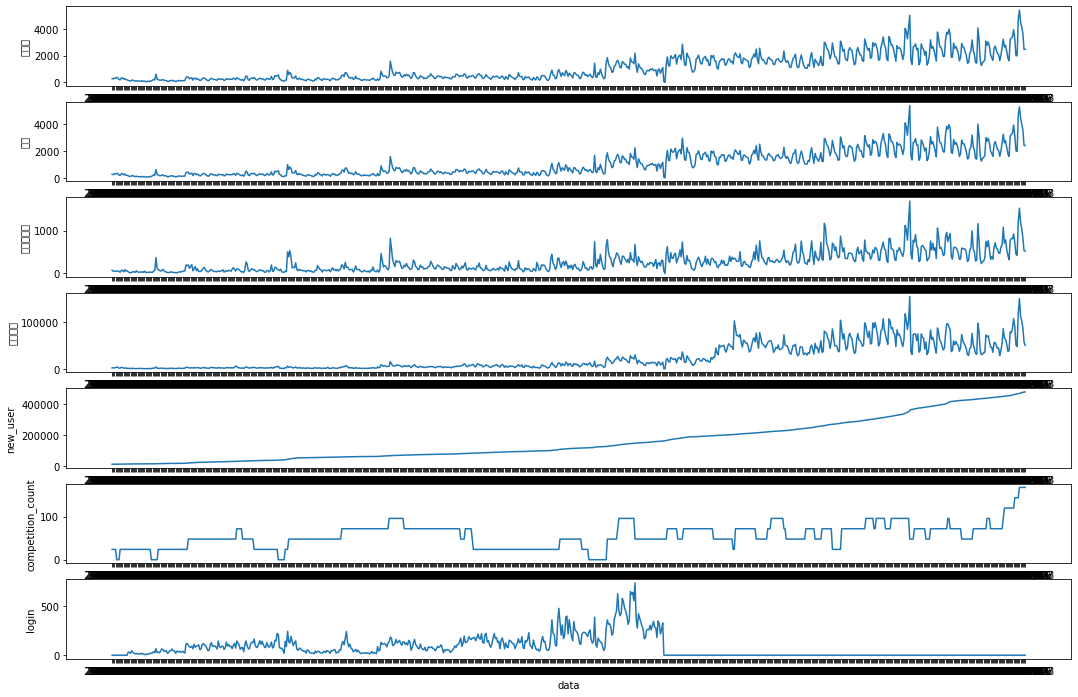

In [23]:
fig, axes = plt.subplots(nrows=7,ncols=1)
fig.set_size_inches(18,12)

sns.lineplot(data=train_group, x = 'data', y = '사용자', ax=axes[0])
sns.lineplot(data=train_group, x = 'data', y = '세션', ax=axes[1])
sns.lineplot(data=train_group, x = 'data', y = '신규방문자', ax=axes[2])
sns.lineplot(data=train_group, x = 'data', y = '페이지뷰', ax=axes[3])
sns.lineplot(data=train_group, x = 'data', y = 'new_user', ax=axes[4])
sns.lineplot(data=train_group, x = 'data', y = 'competition_count', ax=axes[5])
sns.lineplot(data=train_group, x = 'data', y = 'login', ax=axes[6])

### 시간 기준으로 Group

In [24]:
train_group_time = train.groupby('hour').sum()
train_group_time.head(2)

,사용자,세션,신규방문자,페이지뷰,new_user,competition_count,login
hour,,,,,,,
00,36646,40163,8019,842892,5292437.0,1836,2717.0
01,23019,21567,4887,493863,5292839.0,1836,1472.0


<AxesSubplot:xlabel='hour', ylabel='login'>

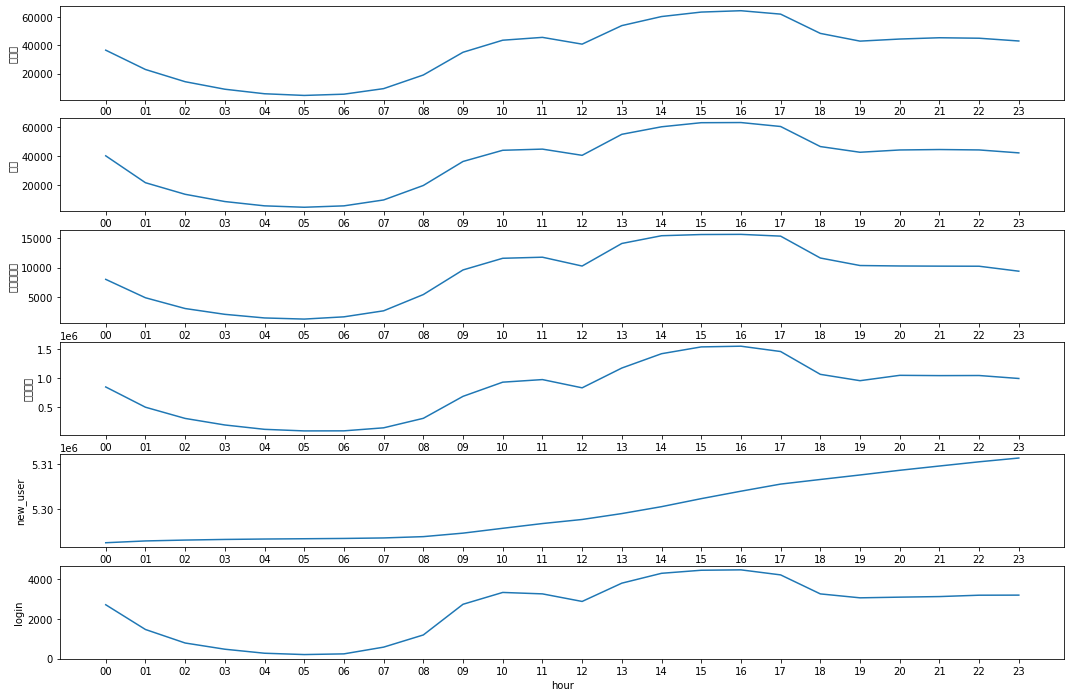

In [26]:
fig, axes = plt.subplots(nrows=6,ncols=1)
fig.set_size_inches(18,12)

sns.lineplot(data=train_group_time, x = 'hour', y = '사용자', ax=axes[0])
sns.lineplot(data=train_group_time, x = 'hour', y = '세션', ax=axes[1])
sns.lineplot(data=train_group_time, x = 'hour', y = '신규방문자', ax=axes[2])
sns.lineplot(data=train_group_time, x = 'hour', y = '페이지뷰', ax=axes[3])
sns.lineplot(data=train_group_time, x = 'hour', y = 'new_user', ax=axes[4])
sns.lineplot(data=train_group_time, x = 'hour', y = 'login', ax=axes[5])